# Data Collection 

## Project Description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

### Table of Contents
* [Studying the Data](#chapter1)
* [Identify the top 10 neighborhoods in terms of drop-offs](#chapter2)
* [Make Graphs](#chapter3)
* [Testing hypotheses](#chapter4)
* [General Conclution](#chapter5)

### Studying the Data
<a class="anchor" id="chapter1"></a>

In [1]:
import math
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
warnings.filterwarnings ("ignore")

%matplotlib inline

In [2]:
local_path1 = '/Users/yoni/Pictures/jupyter/Data Collection and Storage project/csv/project_sql_result_01.csv'
local_path2 = '/Users/yoni/Pictures/jupyter/Data Collection and Storage project/csv/project_sql_result_04.csv'

platform_path1 = '/datasets/project_sql_result_01.csv'
platform_path2 = '/datasets/project_sql_result_04.csv'

try:
    taxi_data = pd.read_csv(local_path1)
except:
    taxi_data = pd.read_csv(platform_path1)
    
try:
    trip_data = pd.read_csv(local_path2)
except:
    trip_data = pd.read_csv(platform_path2)

In [3]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
taxi_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [5]:
taxi_data.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
taxi_data.tail()

,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
63,3556 - 36214 RC Andrews Cab,2


In [7]:
taxi_data[taxi_data['company_name'].isnull()]

,company_name,trips_amount


 **<span style="color:olive">No missing values in the Taxi data</span>**

In [8]:
taxi_data['company_name'] = taxi_data['company_name'].str.lower() #Change to lower case to look for duplicates

In [9]:
taxi_data[taxi_data.duplicated(['company_name'],keep=False)]

,company_name,trips_amount


 **<span style="color:olive">No duplicated values in the Taxi data</span>**

In [10]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
trip_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [12]:
trip_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [13]:
trip_data.tail()

,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


In [14]:
trip_data[trip_data['dropoff_location_name'].isnull()]

,dropoff_location_name,average_trips


In [15]:
trip_data['dropoff_location_name'] = trip_data['dropoff_location_name'].str.lower()

In [16]:
trip_data[trip_data.duplicated(['dropoff_location_name'],keep=False)]

,dropoff_location_name,average_trips


 **<span style="color:olive">No duplicated values in the trip data</span>**

It looks like the data is good to go, The columns are the right type, There are no duplicates and there are no missing values in both of the tables.

### Identify the top 10 neighborhoods in terms of drop-offs
<a class="anchor" id="chapter2"></a>

In [17]:
top_neighborhoods = trip_data.sort_values(by='average_trips',ascending= False).head(10).reset_index()
top_neighborhoods

,index,dropoff_location_name,average_trips
0,0,loop,10727.466667
1,1,river north,9523.666667
2,2,streeterville,6664.666667
3,3,west loop,5163.666667
4,4,o'hare,2546.900000
5,5,lake view,2420.966667
6,6,grant park,2068.533333
7,7,museum campus,1510.000000
8,8,gold coast,1364.233333
9,9,sheffield & depaul,1259.766667


A table with the 10 top neighborhoods in terms of drop off

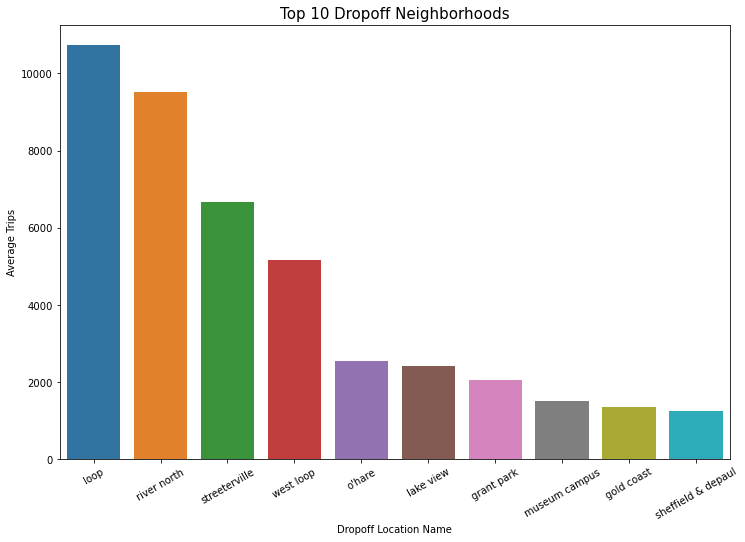

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x="dropoff_location_name", y="average_trips", data=top_neighborhoods).set_title('Top 10 Dropoff Neighborhoods', fontdict={'size':15})
plt.xticks(rotation=30)
plt.xlabel("Dropoff Location Name")
plt.ylabel("Average Trips")
plt.show()

### Taxi companies and number of rides


In [19]:
taxi_data.tail(25)

,company_name,trips_amount
39,0118 - 42111 godfrey s.awir,33
40,6574 - babylon express inc.,31
41,chicago star taxicab,29
42,1085 - 72312 n and w cab co,29
43,2809 - 95474 c & d cab co inc.,29
44,2092 - 61288 sbeih company,27
45,3011 - 66308 jbl cab inc.,25
46,3620 - 52292 david k. cab corp.,21
47,4615 - 83503 tyrone henderson,21
48,3623 - 72222 arrington enterprises,20


 I see that there are a lot of companies that have a very low number of trips i will group together all the companies that have 39 or less trips and will call them 'Other'

In [20]:
taxi_data2 = taxi_data
taxi_data2.loc[taxi_data2.trips_amount <= 39, 'company_name'] = 'other'
taxi_data2.tail(10)

,company_name,trips_amount
54,other,14
55,other,13
56,other,12
57,other,11
58,other,8
59,other,7
60,other,7
61,other,5
62,other,3
63,other,2


### Make Graphs
<a class="anchor" id="chapter3"></a>

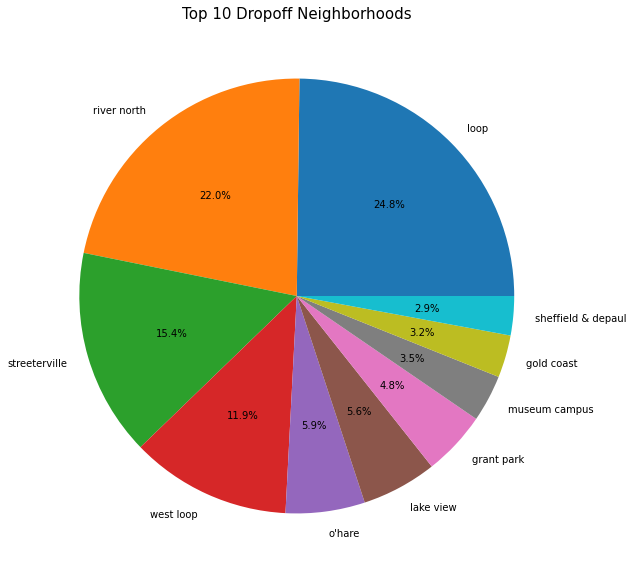

In [21]:
plt.figure(figsize=(10,10))

plt.pie(top_neighborhoods['average_trips'],labels=top_neighborhoods['dropoff_location_name'],autopct='%0.1f%%',)
plt.title('Top 10 Dropoff Neighborhoods', fontdict={'size':15})

plt.show()

From the graph above we can see that there are 2 main neighborhoods that serve as a destination and together they are a bit less then 50% of the total destinations. "river north" and "loop" we can assume that these are probably places that most people come to from neighborhoods centers of buisness and leisure (estaurants ,clubs ect..) and are probably downtown. We can maybe add "streeterville" and " west loop" to that. The rest of the destinations are probably residential neighborhoods and that is the reason they serve as a lower % of the destinations.

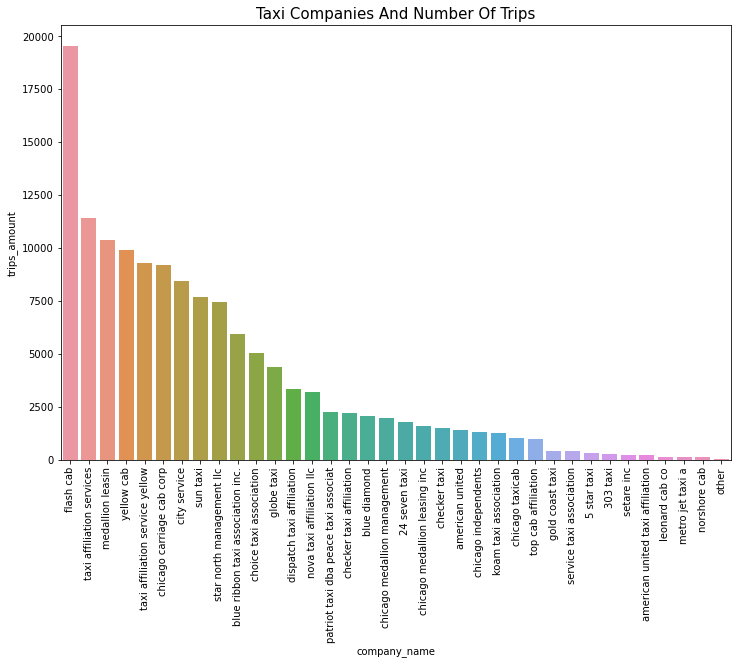

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x="company_name", y="trips_amount", data=taxi_data2).set_title('Taxi Companies And Number Of Trips', fontdict={'size':15})
plt.xticks(rotation=90)
plt.show()

We can see from the graph above that there is one company that realy dominates the taxi market, "Flash cab" has allmost twice as more trips then the second in place. We can think about dividing the companies in 3 or 4 levels, The top lecel is only "flash cab" then second level is all the companies after it that have above 2500 trips, This is the second level. The third level is the companies that have less then 2500 but more then around 100 and the last level is the one we called "other" companies that have allmost no trips (maybe they are specialists or are serving some nitch? like luxury or oparate only in spesific areas). "flash cab" is so high compared to the others that it must have somthing that makes it the leader by so much, Maybe it exists for the longest time or maybe they developed an app that cought on (like get taxi).

### Testing hypotheses 
<a class="anchor" id="chapter4"></a>

In [23]:
local_path3 = '/Users/yoni/Pictures/jupyter/Data Collection and Storage project/csv/project_sql_result_07.csv'

platform_path3 = '/datasets/project_sql_result_07.csv'

try:
    weather_data = pd.read_csv(local_path3)
except:
    weather_data = pd.read_csv(platform_path3)
    

In [24]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [25]:
weather_data.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [26]:
weather_data.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [27]:
weather_data.tail()

,start_ts,weather_conditions,duration_seconds
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0


In [28]:
len(weather_data.query('duration_seconds<60'))

6

I see that there are 6 cases of the ride duration being less then a minute. i think maybe we can leave these in becouse they are only 6 cases from 1068, This casn actually make sense if somone got on the taxi but then changed their mind and got off.

I need to change the 'start_ts' column to date time 

In [29]:
weather_data['start_ts'] =pd.to_datetime(weather_data['start_ts'], format= '%Y-%m-%d %H:%M:%S')
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


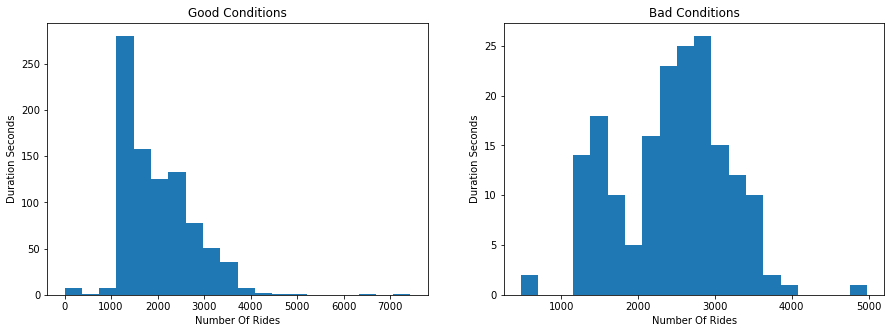

In [30]:
weather_good = weather_data.query('weather_conditions == "Good"')# Table with all the good days data
weather_bad = weather_data.query('weather_conditions == "Bad"') # Table with all the bad days data

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(weather_good['duration_seconds'],bins=20)
plt.ylabel('Duration Seconds')
plt.xlabel('Number Of Rides')
plt.title('Good Conditions')

plt.subplot(122)
plt.hist(weather_bad['duration_seconds'],bins=20)
plt.ylabel('Duration Seconds')
plt.xlabel('Number Of Rides')
plt.title('Bad Conditions')

plt.show()

In these graphs above we can clearly see that the ride duration changes when the weather is "good" or "bad".
On good days the duration is much more consistent and normally it is faster as well, On bad days the duration will be much less predictable.

#### The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

Here our **H0** is: The average duration from the loop to O'Hare International Airport is the same.

our **H1** is: The average duration from the loop to O'Hare International Airport is different

In [31]:
# Calculating the number of data points, i have already separated the god days from the bad above now we just need to print.


print('We have {} data points from good weather days and {} data points from bad weather days'.format(len(weather_good),len(weather_bad)))


We have 888 data points from good weather days and 180 data points from bad weather days


We have enough data points and we can set our **alpha** to 0.05.

In [32]:
# Checking the variance 

alpha= 0.05

result = st.levene(weather_good['duration_seconds'],
                   weather_bad['duration_seconds'], center='mean')
print('P-value',result.pvalue)
if result.pvalue<alpha:
    print('The sample groups do not have equal variance.')
else:
    print('the sample groups have equal variance.')

P-value 0.3968505113995001
the sample groups have equal variance.


In [33]:
results2 = st.ttest_ind(
        weather_good['duration_seconds'], 
        weather_bad['duration_seconds'],equal_var = True) 

print('p-value:', results2.pvalue)

if (results2.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.517970327099473e-12
We reject the null hypothesis


As we can see from the test, We can reject the null hypothesis and say that the average duration of the ride chages on rainy days. This makes a lot of sense becouse traffic is usually slower on rainy days.

### General Conclution
<a class="anchor" id="chapter5"></a>

In this project we lookes at data of taxi rides, it was interesting to see that we can conclude somthing about the structure of the city and its neighborhoods just by looking at taxi ride data. Regardint the taxi companies, we saw that there is a sort of a monopoly of one of the companies and it was interesting trying to figure out the reasons why that company but not another, this data doesn't tell us the whole story of that but we could think of a couple of reasons why Flash Cab has such a big hold of the city.

When we looked at the weather data and the ride duration, Unsurprisingly, we saw that when the conditions were bad the duration on average changed and was longer.

All and all there is still a lot to discover in this data Im sure, But that we will have to do in another time.

